In [4]:
#Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install requests pandas numpy matplotlib


# TODOLIST
# - Need to normalize recording time, so each recording would be same length. 10 minutes would probably do nicely.
# - To plot them together, I'd need to normalize the timeline, too, starting from 0, then based on offset (timestamp)
# - Study brainwave wavelengths, produce material to explain theory
# - Grab a few nice screenies as example
# - Real-time connection with streams?
# - How to read spectrograms?ﬁ

     |████████████████████████████████| 12.4 MB 2.1 MB/s eta 0:00:01
  Using cached kiwisolver-1.1.0-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl (113 kB)
     |████████████████████████████████| 67 kB 9.6 MB/s  eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


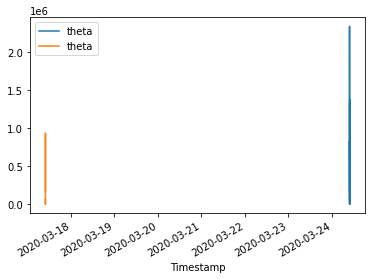

In [11]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_path1 = "arto_watch_youtube_2020-03-24T09:37:03.dat"
data_path2 = "arto_chatting_slack_2020-03-24T09:48:28.dat"

        
        
df1 = pd.read_csv(data_path1,
                 header=0,
                )


df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'])


#print(df['Timestamp'])

# Convert long timestamp to datetime formatted to millisecond precision
#df['Timestamp'] = df['Timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])

# Filter out unused columns
#df = df.drop(["Timestamp", "Attention", "Meditation","Blink"], axis=1)

#print (df)

ax = plt.gca()

#df.plot(kind='line',
#              x='Timestamp',
#              y='Meditation',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='Attention',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='delta',
#              ax=ax)
df1.plot(kind='line',
              x='Timestamp',
              y='theta',
              ax=ax)
df2.plot(kind='line',
              x='Timestamp',
              y='theta',
              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='low-alpha',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='high-alpha',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='low-beta',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='high-beta',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='low-gamma',
#              ax=ax)
#df.plot(kind='line',
#              x='Timestamp',
#              y='mid-gamma',
#              ax=ax)
#plt.show()



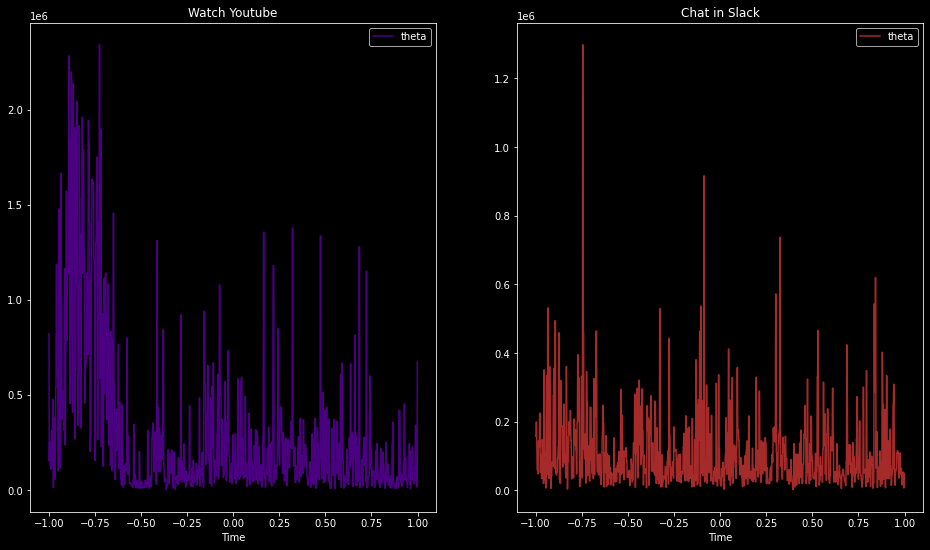

<Figure size 1440x720 with 0 Axes>

In [27]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
from matplotlib.pyplot import figure

data_path1 = "arto_watch_youtube_2020-03-24T09:37:03.dat"
data_path2 = "arto_chatting_slack_2020-03-24T09:48:28.dat"


def read_and_fix_data(path):
    """
    Read csv file, normalize timestamp to a new column, Time, 
    so that timescale is comparable
    """
    df = pd.read_csv(path,header=0)
    df['Timestamp'] = pd.to_datetime(df['Timestamp']).astype('int64')
    max_a = df.Timestamp.max()
    min_a = df.Timestamp.min()
    min_norm = -1
    max_norm =1
    df['Time'] = (df.Timestamp- min_a) *(max_norm - min_norm) / (max_a-min_a) + min_norm    
    return df

df1 = read_and_fix_data(data_path1)
df2 = read_and_fix_data(data_path2)

#print(plt.style.available)
#plt.style.use('dark_background') 

plt.rcParams['figure.figsize'] = [10/2.54, 8/2.54]

fig, ax = plt.subplots(figsize=(16,9),ncols=2)

plt.figure(figsize=(20,10))

#plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

def plot_df(df, ax, stat, label, color):
    df.plot(kind='line',
        x='Time',
        y=stat,
        title=label,
        color=color,
        ax=ax)

plot_df(df1, ax[0], 'theta','Watch Youtube','Indigo')
plot_df(df2, ax[1], 'theta','Chat in Slack','Brown')
    
fig.savefig('ThetaComparison2.png',format="png")

plt.show()

#plt.close()


In [14]:
#fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
#xfmt = md.DateFormatter('%M:%S')
#ax1.xaxis.set_major_formatter(xfmt)
#ax1.xaxis_date()
#ax1.plot(eeg.index, eeg.raw); ax1.set_title('Raw EEG')
#ax2.specgram(eeg['Raw'], Fs=25); ax2.set_title('Spectrogram'); ax2.set_ylabel('Freq (Hz)');
#ax2.set_xlabel('Time (s)');


#ax = plt.specgram(df['Raw'], Fs=25); 
#ax.set_title('Spectrogram');
#ax.set_ylabel('Raw');
#ax.set_xlabel('Timestamp');

In [15]:
#plt.savefig('Normal Distribution.png')
#from IPython.display import Image
#Image('normal_distribution.png')